
# Data Science on Software Data
<b>Markus Harrer</b>, Software Development Analyst
  
`@feststelltaste`


<small>Java Forum Stuttgart 2019, 04.07.2019</small>

<img src="../resources/innoq_logo.jpg" width=20% height="20%" align="right"/>

## Data Science

### Was ist Data Science?

"**Statistik** auf nem <b><span class="green">Mac</span></b>."
<br/>
<br/>
<div align="right"><small>Nach https://twitter.com/cdixon/status/428914681911070720</small></div>

### Meine Definition

#### Was bedeutet "**data**"?
"Without **data** you‘re just another person with an opinion."
<br/>
<div align="right"><small>W. Edwards Deming</small></div>

<b>=> Belastbare Erkenntnisse mittels <span class="green">Fakten</span> liefern</b>

#### Was bedeutet "**science**"?
  
  
"The aim of **science** is to seek the simplest explanations of complex facts."
<br/>
<div align="right"><small>Albert Einstein</small></div>

<b>=> Neue Erkenntnisse <span class="green">verständlich</span> herausarbeiten</b>

### Was ist ein Data Scientist?
"Jemand, der mehr Ahnung von **Statistik**<br/>
&nbsp;&nbsp;hat als ein <b><span class="green">Softwareentwickler</span></b><br/>
&nbsp;&nbsp;und mehr Ahnung von <b><span class="green">Softwareentwicklung</span></b><br/>
&nbsp;&nbsp;als ein **Statistiker**."
<br/>
<br/>
<div align="right"><small>Nach zu https://twitter.com/cdixon/status/428914681911070720</small></div>

<b>Data Science & Software Data:</b> **Perfect** <b><span class="green">match</span></b>!

## Software Data

### Was ist Software Data?

* Statisch
* Laufzeit
* Chronologisch
* Community

<b>=> Krass viel!</b>

### Beispiele für Analysen

* Performance-Bottlenecks
* Verborgene Teamkommunikation
* No-Go-Areas
* Architektur-/Design-/Code-Smells
* ...

## Vorgehen

I. Fragestellung  
II. Datenbeschaffung  
III. Modellierung  
IV. Interpretation  
V. Kommunikation  

<b>=> von der <strong>Frage</strong> über die <span class="green">Daten</span> zur <span class="blue" style="background-color: #FFFF00">Erkenntnis</span>!</b>

## Grundprinzip

<code>
(Data + Code + Ergebnis) * Automatisierung
= Reproduzierbare Analysen</code>

Schlüssel: **Computational notebooks**

### Der Notebook-Ansatz
<br/>
  

<div align="center"><img src="../resources/notebook_approach.jpg"></div>

## Technik

### Technologie (1/2)
Klassischer Data-Science-Werkzeugkasten
* **Jupyter** (mit RISE)
* Python 3
* pandas
* matplotlib

### Technologie (2/2)
**Jupyter** funktioniert und integriert sich auch mit
* Cypher / Neo4j / jQAssistant
* JVM-Sprachen über beakerx / Tablesaw
* bash
* ...

# Praktischer Teil

## Erstes Hands-On

### Code-Hot-Spots ermitteln

#### Untersuchungsobjekt: IntelliJ IDEA

* IDE für die Java-Entwicklung
* Vieles in Java geschrieben
* Großes und lang entwickeltes Projekt

### I. Fragestellung (1/2)

<b>Frage</b>
* Gibt es Code Hotspots (Code, der besonders komplex ist und oft geändert wird)?


### I. Fragestellung (2/2)
#### Umsetzungsidee
* Werkzeuge: Jupyter, Python, pandas, matplotlib
* Heuristik:
 * "komplex": Lines of Code
 * "geändert": Anzahl Git commits


**Meta-Ziel:** Grundfunktionen anhand eines einfachen Show-Cases sehen.

### II. Datenbeschaffung
* Daten müssen aus Software-typischen Datenquellen in die Data Science Welt geladen werden
* Daten müssen hier teils auch bereinigt oder gefiltert werden

*Wir holen Git Log Daten aus einem Git Repo*

In [1]:
import pandas as pd

log = pd.read_csv("../dataset/git_log_intellij.csv")
log.head()

,additions,deletions,file,sha,timestamp,author
0,9.0,1.0,resources/src/META-INF/JavaIdePlugin.xml,259f603ff89b,2019-03-19 15:02:59,Nikolay Chashnikov
1,2.0,0.0,resources/src/META-INF/JavaIdePlugin.xml,dff02c4c04e9,2019-03-19 12:45:15,Nikolay Chashnikov
2,0.0,1.0,resources/src/META-INF/JavaIdePlugin.xml,b3d671515bc6,2019-03-13 16:28:28,Gregory Shrago
3,1.0,1.0,resources/src/META-INF/JavaIdePlugin.xml,212b3f5c52e7,2019-03-12 14:59:53,Kirill Kirichenko
4,1.0,1.0,resources/src/META-INF/JavaIdePlugin.xml,166487b26534,2019-03-12 12:15:43,Dmitry Krasilschikov


*Was haben wir hier eigentlich?*

In [2]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551620 entries, 0 to 551619
Data columns (total 6 columns):
additions    542444 non-null float64
deletions    542444 non-null float64
file         551620 non-null object
sha          551619 non-null object
timestamp    551619 non-null object
author       551619 non-null object
dtypes: float64(2), object(4)
memory usage: 25.3+ MB


<b>1</b> **DataFrame** (~ programmierbares Excel-Arbeitsblatt), <b>6</b> **Series** (= Spalten), <b>551620 </b> **Rows** (= Einträge)

*Wir wandeln den Zeitstempeltext in ein Zeitstempelobjekt um.*

In [3]:
log['timestamp'] = pd.to_datetime(log['timestamp'])
log.head()

,additions,deletions,file,sha,timestamp,author
0,9.0,1.0,resources/src/META-INF/JavaIdePlugin.xml,259f603ff89b,2019-03-19 15:02:59,Nikolay Chashnikov
1,2.0,0.0,resources/src/META-INF/JavaIdePlugin.xml,dff02c4c04e9,2019-03-19 12:45:15,Nikolay Chashnikov
2,0.0,1.0,resources/src/META-INF/JavaIdePlugin.xml,b3d671515bc6,2019-03-13 16:28:28,Gregory Shrago
3,1.0,1.0,resources/src/META-INF/JavaIdePlugin.xml,212b3f5c52e7,2019-03-12 14:59:53,Kirill Kirichenko
4,1.0,1.0,resources/src/META-INF/JavaIdePlugin.xml,166487b26534,2019-03-12 12:15:43,Dmitry Krasilschikov


*Wir sehen uns nur die jüngsten Änderungen an.*

In [4]:
recent_log = log[log['timestamp'] > log['timestamp'].max() - pd.Timedelta('90 days')]
recent_log.head()

,additions,deletions,file,sha,timestamp,author
0,9.0,1.0,resources/src/META-INF/JavaIdePlugin.xml,259f603ff89b,2019-03-19 15:02:59,Nikolay Chashnikov
1,2.0,0.0,resources/src/META-INF/JavaIdePlugin.xml,dff02c4c04e9,2019-03-19 12:45:15,Nikolay Chashnikov
2,0.0,1.0,resources/src/META-INF/JavaIdePlugin.xml,b3d671515bc6,2019-03-13 16:28:28,Gregory Shrago
3,1.0,1.0,resources/src/META-INF/JavaIdePlugin.xml,212b3f5c52e7,2019-03-12 14:59:53,Kirill Kirichenko
4,1.0,1.0,resources/src/META-INF/JavaIdePlugin.xml,166487b26534,2019-03-12 12:15:43,Dmitry Krasilschikov


*Wir wollen nur Java-Code verwenden.*

In [5]:
java = recent_log[recent_log['file'].str.endswith(".java")].copy()
java.head()

,additions,deletions,file,sha,timestamp,author
250,17.0,2.0,plugins/gradle/native/tooling/src/builder/CppM...,5d0fc88e519c,2019-03-01 11:57:43,Nikita Skvortsov
271,20.0,1.0,plugins/gradle/src/org/jetbrains/plugins/gradl...,5d0fc88e519c,2019-03-01 11:57:43,Nikita Skvortsov
272,62.0,44.0,plugins/gradle/src/org/jetbrains/plugins/gradl...,abd0a37dc2e3,2019-02-21 13:08:32,Vladislav Soroka
273,42.0,8.0,plugins/gradle/src/org/jetbrains/plugins/gradl...,d776fddb8625,2019-02-19 11:13:43,Vladislav Soroka
274,6.0,0.0,plugins/gradle/src/org/jetbrains/plugins/gradl...,489676110b06,2019-02-01 14:17:51,Bradley Smith


### III. Modellierung

* Vorhandene Daten noch zusätzlich mit anderen Datenquellen verschneiden
 * Aber auch: Teile aus vorhanden Daten extrahieren
* Neue Sichten auf die Daten schaffen

*Wir zählen die Code-Zeilen.*

In [6]:
java['loc'] = java['additions'] - java['deletions']
java.head()

,additions,deletions,file,sha,timestamp,author,loc
250,17.0,2.0,plugins/gradle/native/tooling/src/builder/CppM...,5d0fc88e519c,2019-03-01 11:57:43,Nikita Skvortsov,15.0
271,20.0,1.0,plugins/gradle/src/org/jetbrains/plugins/gradl...,5d0fc88e519c,2019-03-01 11:57:43,Nikita Skvortsov,19.0
272,62.0,44.0,plugins/gradle/src/org/jetbrains/plugins/gradl...,abd0a37dc2e3,2019-02-21 13:08:32,Vladislav Soroka,18.0
273,42.0,8.0,plugins/gradle/src/org/jetbrains/plugins/gradl...,d776fddb8625,2019-02-19 11:13:43,Vladislav Soroka,34.0
274,6.0,0.0,plugins/gradle/src/org/jetbrains/plugins/gradl...,489676110b06,2019-02-01 14:17:51,Bradley Smith,6.0


*Wir aggregieren die Zeilen sowie die Anzahl der Änderungen pro Datei.*

In [7]:
hotspots = java.groupby('file')['loc'].agg(['sum', 'count'])
hotspots.columns = ['loc', 'changes']
hotspots.head()

,loc,changes
file,,
RegExpSupport/gen/org/intellij/lang/regexp/_RegExLexer.java,109.0,1
RegExpSupport/src/org/intellij/lang/regexp/RegExpCapability.java,5.0,1
RegExpSupport/src/org/intellij/lang/regexp/RegExpCompletionContributor.java,22.0,1
RegExpSupport/src/org/intellij/lang/regexp/RegExpLanguageHost.java,12.0,1
RegExpSupport/src/org/intellij/lang/regexp/RegExpLanguageHosts.java,11.0,1


### VI. Interpretation
* Vorhandene Daten sind oft zu viel für manuelle Sichtung
* Neue Einsichten über eine Frage aber oft auf hoher Flugbahn möglich

*Wir zeigen die TOP 10 Hotspots an.*

In [8]:
top10_hotspots = hotspots.sort_values(by="changes", ascending=False).head(10)
top10_hotspots

,loc,changes
file,,
platform/platform-impl/src/com/intellij/ide/actions/RecentLocationsAction.java,377.0,54
platform/core-impl/src/com/intellij/ide/plugins/PluginManagerCore.java,78.0,35
platform/extensions/src/com/intellij/openapi/extensions/impl/ExtensionPointImpl.java,232.0,32
platform/util/src/com/intellij/icons/AllIcons.java,-18.0,30
platform/platform-impl/src/com/intellij/openapi/application/impl/ApplicationImpl.java,-7.0,28
platform/platform-impl/src/com/intellij/ide/actions/Switcher.java,104.0,27
platform/platform-impl/src/com/intellij/idea/StartupUtil.java,118.0,27
platform/core-impl/src/com/intellij/openapi/components/impl/ComponentManagerImpl.java,21.0,27
platform/platform-impl/src/com/intellij/openapi/vfs/newvfs/persistent/LocalFileSystemRefreshWorker.java,92.0,26


### V. Kommunikation
* Grafische Darstellung geben den letzten Schliff
* Probleme können Außenstehenden visuell dargestellt besser kommuniziert werden

*Wir plotten die TOP 10 Liste als XY-Diagramm.*

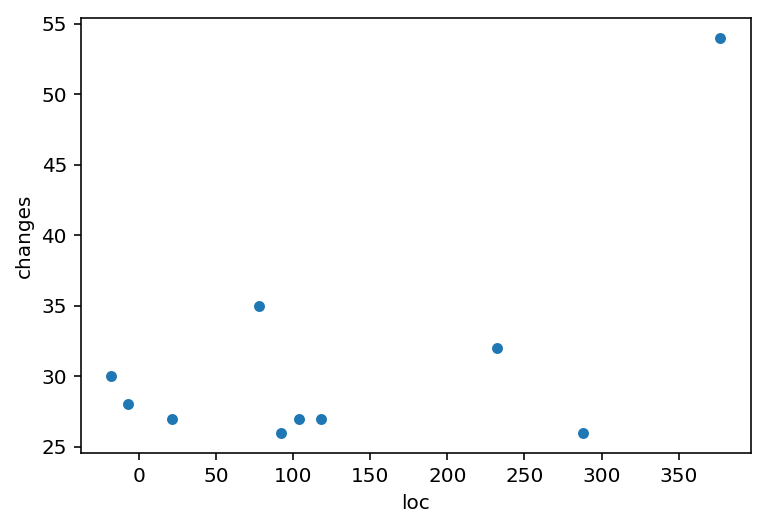

In [9]:
top10_hotspots.plot.scatter('loc', 'changes');

### Ende des ersten Hands-Ons

## Weitere Analysen

* Bewertung von CPU-Performance-Problemen
* Performance-Hotspots mit Neo4j
* Priorisieren von Aufräumarbeiten mit Tablesaw

## Ausblick

# <strong>E</strong><span class="grey"><b>V</b></span><span class="green"><b>A</b></span> mit **OZAPFDIS**, <span class="grey"><b>pandas</b></span> und <span class="green"><b>AUSI</b></span>

Beispiel: Abhängigkeitsanalyse mit Daten von `jdeps` und Visualisierung mit `D3`.

## Zusammenfassung
**1.** <b>Analysen</b> mit Standard-Werkzeugen <b>einfach</b> möglich  
**2.** Wer mehr will bekommt auch <b>mehr</b>!  
**3.** Es gibt unglaublich <b>viele Quellen</b> für Daten in der Softwareentwicklung  

<b>=> von der <strong>Frage</strong> über die <span class="green">Daten</span> zur <span class="blue" style="background-color: #FFFF00">Erkenntnis</span>!</b>

## Literatur
* Adam Tornhill: Software Design X-Ray 
* Wes McKinney: Python For Data Analysis
* Leek, Jeff: The Elements of Data Analytic Style
* Tim Menzies, Laurie Williams, Thomas Zimmermann: Perspectives on Data Science for Software Engineering

# Vielen Dank! Fragen?

<b>Markus Harrer</b><br/>
innoQ Deutschland GmbH
  
markus.harrer@innoq.com 

`@feststelltaste`

<small>Demos & "Slides": https://github.com/feststelltaste/software-analytics => demos/20190704_JFS_2019/</small>
<img src="../resources/innoq_logo.jpg" width="20%" heigth="20%" align="right"/>